# Unified Data Fusion Workflow with Auto-Detection

This notebook demonstrates **automatic data fusion workflow detection** using `BaseAgent.run_unified_agent_workflow()`.

## Data Fusion Workflow

Integrate multiple geophysical methods for comprehensive subsurface characterization:
- **Seismic** → velocity structure
- **ERT** → structure-constrained resistivity inversion
- **Petrophysics** → water content with uncertainty

## How It Works

```python
# 1. Describe your data fusion workflow in natural language
user_request = "Use seismic at threshold 1000 m/s to constrain ERT..."

# 2. System automatically detects DATA FUSION workflow
config = context_agent.parse_request(user_request)
results, plan, interpretation, files = BaseAgent.run_unified_agent_workflow(
    config, api_key, llm_model, llm_provider, output_dir
)

# 3. Get complete multi-method results + comprehensive report
```

## Key Features

✅ **Auto-Detection**: Detects data fusion mode from multi-method references  
✅ **Structure Constraints**: Seismic interfaces guide ERT inversion  
✅ **Layer-Specific**: Different petrophysical parameters per layer  
✅ **Uncertainty**: Monte Carlo analysis for water content  

---

## 1. Setup and Imports

Run the cells below to see automatic data fusion detection in action!

In [1]:
import os
import sys
from pathlib import Path

# Import core agents - BaseAgent has the unified workflow logic built-in!
from PyHydroGeophysX.agents import (
    BaseAgent,
    ContextInputAgent
)

# Setup default output directory for data fusion workflows
default_output_dir = Path('results/unified_workflow/example3')
default_output_dir.mkdir(parents=True, exist_ok=True)

print("✓ All packages imported successfully")
print("✓ Using BaseAgent.run_unified_agent_workflow() for auto-detection")
print("✓ Workflow type will be automatically detected from your request!")
print(f"✓ Output directory: {default_output_dir}")

API path =  c:\Users\hchen117\.conda\envs\pg\Lib\site-packages\resipy
ResIPy version =  3.6.3
cR2.exe found and up to date.
R3t.exe found and up to date.
cR3t.exe found and up to date.
✓ All packages imported successfully
✓ Using BaseAgent.run_unified_agent_workflow() for auto-detection
✓ Workflow type will be automatically detected from your request!
✓ Output directory: results\unified_workflow\example3


## 2. Configure API Key

Set your OpenAI API key here:

In [2]:
# Set API key directly (or it will try to get from environment)
# os.environ['OPENAI_API_KEY'] = 'your-key-here'

# Configure API
llm_provider = 'openai'  # Options: 'openai', 'gemini', 'claude'
llm_model = 'gpt-4o-mini'
api_key = os.getenv('OPENAI_API_KEY')

if not api_key:
    print("⚠️  Warning: API key not found")
else:
    print(f"✓ Using {llm_provider} with model {llm_model}")

# Initialize context agent for natural language parsing
context_agent = ContextInputAgent(api_key=api_key, model=llm_model, llm_provider=llm_provider)

print("✓ System ready - using BaseAgent.run_unified_agent_workflow()")
print("✓ Workflow type will be automatically detected from your request!")

✓ Using openai with model gpt-4o-mini
✓ System ready - using BaseAgent.run_unified_agent_workflow()
✓ Workflow type will be automatically detected from your request!


## 3. Data Fusion Workflow Example

The system automatically detects **DATA FUSION** mode when you provide:
- Multiple geophysical methods (seismic + ERT)
- Velocity threshold for interface extraction
- Structure-constrained inversion settings
- Layer-specific petrophysical parameters

This example uses:
- **Field seismic** from `data/Seismic/srtfieldline2.dat`
- **Field ERT** from `data/ERT/Bert/fielddataline2.dat`
- **Velocity threshold** at 1000 m/s for layer boundary
- **Layer-specific petrophysics** with Monte Carlo uncertainty

USER REQUEST:
I need to characterize subsurface water content using a multi-method approach with field data:

1. First, use field seismic refraction data to identify the boundary between regolith and fractured bedrock.
   The seismic data is in 'data/Seismic/srtfieldline2.dat' (BERT format)
   Use a velocity threshold of 1000 m/s to extract the interface for regolith and fractured bedrock.

2. Then, use this seismic structure to constrain ERT inversion with field ERT data.
   The ERT data is in 'data/ERT/Bert/fielddataline2.dat' (BERT format).
   Apply moderate regularization (lambda=20) since we have structural constraints and field data.

3. Finally, convert the resistivity model to water content using layer-specific petrophysical parameters.
   Use Monte Carlo uncertainty analysis with 100 realizations.
   Account for different petrophysical properties in regolith vs fractured bedrock layers:
   - Regolith layer: rho_sat (50-250 Ωm), n (1.3-2.2), porosity (0.25-0.5)
   - Fractured b

13/11/25 - 15:41:28 - pyGIMLi - INFO - Found 1 regions.
13/11/25 - 15:41:28 - pyGIMLi - INFO - Found 1 regions.


[data_fusion] [INFO] Data fusion planning completed successfully
[data_fusion] [INFO] Executing 4 workflow steps
[data_fusion] [INFO] Step 1/4: seismic_inversion using SeismicAgent
[data_fusion] [INFO] Running seismic inversion with velocity_threshold=1000 m/s from user config
[seismic_processor] [INFO] Starting seismic data processing
[seismic_processor] [INFO] Processing seismic tomography
[seismic_processor] [INFO] Inversion parameters: lam=50, zWeight=0.2


13/11/25 - 15:41:28 - pyGIMLi - ERROR - <class 'pygimli.physics.traveltime.TravelTimeManager.TravelTimeManager'>.checkError(c:\Users\hchen117\.conda\envs\pg\Lib\site-packages\pygimli\physics\traveltime\TravelTimeManager.py:105)
DataContainer has no "err" values. Fallback to 3%
13/11/25 - 15:41:28 - pyGIMLi - INFO - Creating forward mesh from region infos.
13/11/25 - 15:41:28 - pyGIMLi - INFO - Creating refined mesh (secnodes: 2) to solve forward task.
13/11/25 - 15:41:28 - pyGIMLi - INFO - Create gradient starting model. 500: 5000
13/11/25 - 15:41:28 - pyGIMLi - INFO - Created startmodel from forward operator:1141, min/max=0.000200/0.002000
13/11/25 - 15:41:28 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.traveltime.modelling.TravelTimeDijkstraModelling object at 0x00000298C050C9A0>
Data transformation: Identity transform
Model transformation (cumulative):
	 0 Logarithmic LU transform, lower bound 0.0001, upper bound 0.0025
min/max (data): 0.0048/0.06
min/max (error): 3%/3%
min/max (start model): 2.0e-04/0.002
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =   63.42
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =   26.51 (dPhi = 52.65%) lam: 50.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =   20.03 (dPhi = 28.43%) lam: 50.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =   18.10 (dPhi = 7.05%) lam: 50.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² =   17.66 (dPhi = 3.34%) lam: 50.0
----------

13/11/25 - 15:41:38 - pyGIMLi - INFO - Cache c:\Users\hchen117\.conda\envs\pg\Lib\site-packages\pygimli\physics\ert\ert.py:createGeometricFactors restored (0.0s x 31): C:\Users\hchen117\AppData\Roaming\pygimli\Cache\14670993637005926040
13/11/25 - 15:41:38 - pyGIMLi - INFO - Found 3 regions.
13/11/25 - 15:41:38 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
13/11/25 - 15:41:38 - pyGIMLi - INFO - Creating forward mesh from region infos.


[seismic_processor] [INFO] Velocity range: 404 - 2348 m/s
[data_fusion] [INFO] Step 2/4: interface_extraction using SeismicAgent
[data_fusion] [INFO] Interface extracted: 500 points at 1000 m/s
[data_fusion] [INFO] Step 3/4: constrained_ert using StructureConstraintAgent
[data_fusion] [INFO] Loading ERT data from: data\ERT\Bert\fielddataline2.dat
[data_fusion] [INFO]   Loaded using PyGIMLi's ert.load()
[data_fusion] [INFO] ERT data loaded: 72 electrodes, 936 measurements
[data_fusion] [INFO] Got interface_coords from previous step: 500 points
[data_fusion] [INFO]   Interface X range: -4.3 - 74.6
[data_fusion] [INFO]   Interface Z range: -18.8 - -4.6
[data_fusion] [INFO] Calling StructureConstraintAgent.execute()...
[structure_constraint] [INFO] Starting structure-constrained ERT inversion
[structure_constraint] [INFO] Using provided interface coordinates with 500 points
[structure_constraint] [INFO] Interface has 500 points
[structure_constraint] [INFO] Creating mesh with structural co

13/11/25 - 15:41:38 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
13/11/25 - 15:41:38 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 11871 Cells: 23328 Boundaries: 17702
13/11/25 - 15:41:38 - pyGIMLi - INFO - Use median(data values)=210.285
13/11/25 - 15:41:38 - pyGIMLi - INFO - Created startmodel from forward operator:4701, min/max=210.285000/210.285000
13/11/25 - 15:41:38 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x00000298C23C2FC0>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation (cumulative):
	 0 Logarithmic LU transform, lower bound 1.0, upper bound 10000.0
	 1 Logarithmic LU transform, lower bound 1.0, upper bound 10000.0
min/max (data): 68.24/644
min/max (error): 5.08%/5.73%
min/max (start model): 210/210
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =   46.55
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =    4.38 (dPhi = 88.92%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =    1.48 (dPhi = 55.17%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =    1.42 (dPhi = 1.77%) lam: 20.0
##############################################################

MC Realizations: 100%|██████████| 100/100 [00:00<00:00, 12355.08it/s]

[petrophysics] [INFO] Monte Carlo simulation completed
[petrophysics] [INFO] Results saved to disk
[petrophysics] [INFO] Generating interpretation of petrophysical results


[petrophysics] [INFO] Water content range: 0.1191 - 0.2479
[petrophysics] [INFO] Mean uncertainty: 0.0259
[data_fusion] [INFO] All workflow steps completed successfully
[report_generator] [INFO] Starting data fusion report generation
[report_generator] [INFO] Generating multi-method visualizations


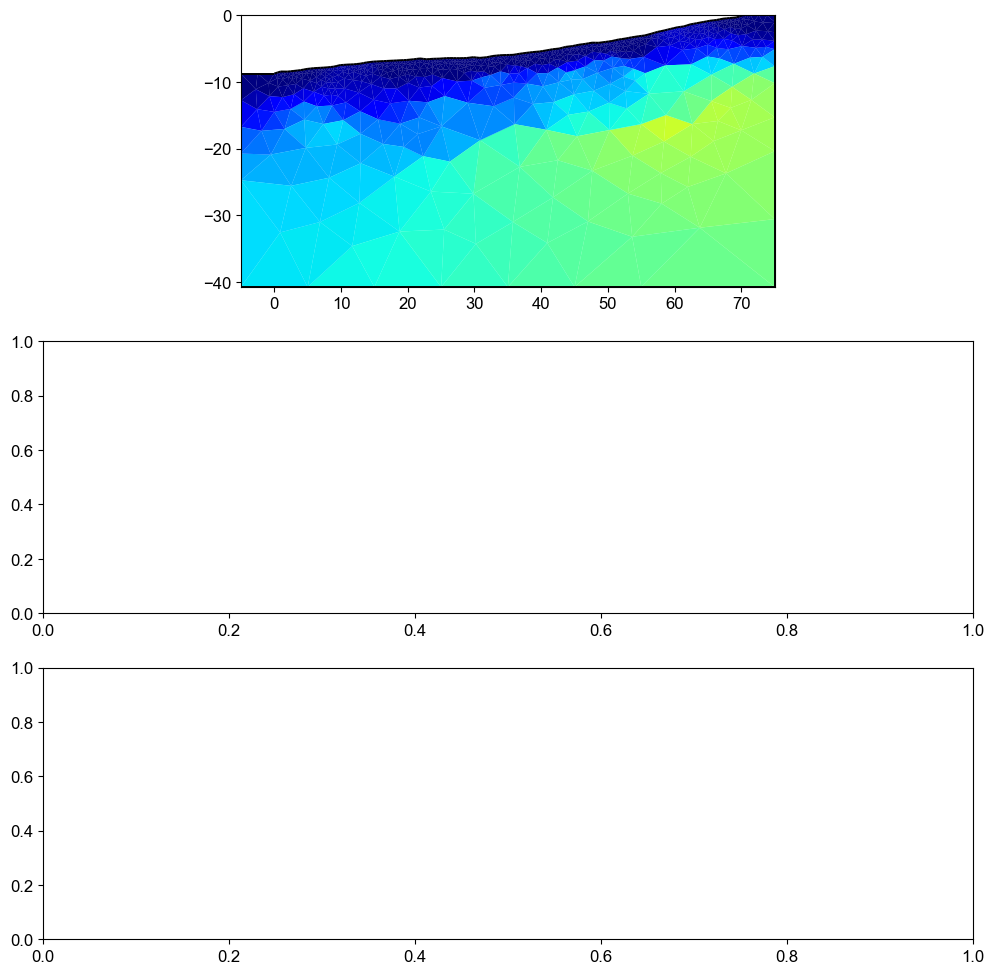

c:\Users\hchen117\.conda\envs\pg\Lib\site-packages\pygimli\viewer\mpl\colorbar.py:321: UserWarning: Adding colorbar to a different Figure <Figure size 1200x1200 with 4 Axes> than <Figure size 640x480 with 0 Axes> which fig.colorbar is called on.
  cbar = cbarTarget.colorbar(gci, cax=cax, orientation=orientation)
c:\Users\hchen117\.conda\envs\pg\Lib\site-packages\pygimli\viewer\mpl\colorbar.py:321: UserWarning: Adding colorbar to a different Figure <Figure size 1200x1200 with 5 Axes> than <Figure size 640x480 with 0 Axes> which fig.colorbar is called on.
  cbar = cbarTarget.colorbar(gci, cax=cax, orientation=orientation)
c:\Users\hchen117\.conda\envs\pg\Lib\site-packages\pygimli\viewer\mpl\colorbar.py:321: UserWarning: Adding colorbar to a different Figure <Figure size 1200x1200 with 6 Axes> than <Figure size 640x480 with 0 Axes> which fig.colorbar is called on.
  cbar = cbarTarget.colorbar(gci, cax=cax, orientation=orientation)


[report_generator] [INFO] Saved complete workflow visualization
[report_generator] [INFO] Saved water content visualization
[report_generator] [INFO] Generating fusion narrative with LLM
[report_generator] [INFO] Data fusion report saved to results\unified_workflow\example3\data_fusion_report.md
[report_generator] [INFO] PDF report saved to results\unified_workflow\example3\data_fusion_report.pdf

WORKFLOW RESULTS

💡 Interpretation:
This fusion approach is valuable because it leverages the strengths of seismic and electrical resistivity tomography (ERT) data, combining structural information with hydrological characteristics to create a more comprehensive subsurface model. By integrating seismic inversion results to extract interfaces and applying structural constraints during the ERT process, this method enhances the accuracy of resistivity models, particularly in complex geological settings. Compared to single-method approaches, this strategy improves the resolution of subsurface fea

<Figure size 640x480 with 0 Axes>

In [3]:
# Example: Data Fusion Workflow with Multi-Method Integration
# The system detects DATA FUSION from seismic+ERT references and auto-executes!

user_request = """I need to characterize subsurface water content using a multi-method approach with field data:

1. First, use field seismic refraction data to identify the boundary between regolith and fractured bedrock.
   The seismic data is in 'data/Seismic/srtfieldline2.dat' (BERT format)
   Use a velocity threshold of 1000 m/s to extract the interface for regolith and fractured bedrock.

2. Then, use this seismic structure to constrain ERT inversion with field ERT data.
   The ERT data is in 'data/ERT/Bert/fielddataline2.dat' (BERT format).
   Apply moderate regularization (lambda=20) since we have structural constraints and field data.

3. Finally, convert the resistivity model to water content using layer-specific petrophysical parameters.
   Use Monte Carlo uncertainty analysis with 100 realizations.
   Account for different petrophysical properties in regolith vs fractured bedrock layers:
   - Regolith layer: rho_sat (50-250 Ωm), n (1.3-2.2), porosity (0.25-0.5)
   - Fractured bedrock layer: rho_sat (165-350 Ωm), n (2.0-2.2), porosity (0.2-0.3)

This is a full structure-constrained hydrogeophysical workflow for field data analysis."""

print("="*70)
print("USER REQUEST:")
print(user_request)
print("="*70)

# Parse natural language request
print("\n🤖 Parsing request...")
config = context_agent.parse_request(user_request)
print("✓ Configuration generated")

# Debug: Print config to see what was extracted
print(f"\n[DEBUG] Config keys: {list(config.keys())}")
print(f"\n[DEBUG] Workflow configuration:")
import json
print(json.dumps(config, indent=2, default=str))

# Check for multi-method setup
if 'seismic_file' in config and 'ert_file' in config:
    print(f"\n[DEBUG] Multi-method data fusion detected:")
    print(f"  Seismic: {config['seismic_file']}")
    print(f"  ERT: {config['ert_file']}")
    if 'velocity_threshold' in config:
        print(f"  Velocity threshold: {config['velocity_threshold']} m/s")
else:
    print("\n⚠️ WARNING: Multi-method setup not fully detected")

# Check for layer-specific parameters
if 'layer_params' in config:
    print(f"\n[DEBUG] Layer-specific petrophysics enabled")
    print(f"  Number of layers: {len(config['layer_params'])}")
else:
    print("\n[INFO] Using default petrophysical parameters")

# Run unified workflow - automatically detects DATA FUSION and executes!
print("\n🚀 Running unified workflow (auto-detecting type)...")
output_dir = Path('results/unified_workflow/example3')
results, execution_plan, interpretation, report_files = BaseAgent.run_unified_agent_workflow(
    config, api_key, llm_model, llm_provider, output_dir
)

# Display results
print("\n" + "="*70)
print("WORKFLOW RESULTS")
print("="*70)
if interpretation:
    print(f"\n💡 Interpretation:\n{interpretation}")
    
if execution_plan:
    print(f"\n📋 Execution Plan ({len(execution_plan)} steps):")
    for i, step in enumerate(execution_plan, 1):
        print(f"  {i}. {step['step']} → {step['agent']}")

if results.get('status') == 'success':
    print("\n✅ Workflow completed successfully!")
    
    # Display data fusion specific results
    if 'statistics' in results:
        stats = results['statistics']
        print(f"\n📊 Data fusion results:")
        if 'resistivity_range' in stats:
            print(f"  - Resistivity range: {stats['resistivity_range'][0]:.1f} - "
                  f"{stats['resistivity_range'][1]:.1f} Ωm")
        if 'wc_range' in stats:
            print(f"  - Water content range: {stats['wc_range'][0]:.4f} - "
                  f"{stats['wc_range'][1]:.4f}")
        
    if report_files:
        print(f"\n📄 Generated {len(report_files)} report files:")
        for name, path in report_files.items():
            print(f"  - {name}: {path}")
else:
    print(f"\n❌ Workflow failed: {results.get('error')}")

print("\n💡 TIP: The data fusion workflow includes:")
print("  - Seismic velocity inversion")
print("  - Interface extraction at velocity threshold")
print("  - Structure-constrained ERT inversion")
print("  - Layer-specific petrophysical conversion")
print("  - Monte Carlo uncertainty quantification")
print("="*70)

## Summary

This notebook demonstrates the unified geophysical workflow interface with data fusion:

- **Single Entry Point**: Just describe what you want in natural language
- **Auto-Detection**: WorkflowOrchestratorAgent determines the workflow type
- **Intelligent Routing**: Automatically uses the right agents for the task
- **Three Workflow Types**: Standard ERT, Time-Lapse, and Data Fusion

### For Data Fusion Workflows:

The `DataFusionAgent.execute_full_workflow()` method handles everything internally:
- Loads seismic and ERT data
- Runs seismic inversion (via SeismicAgent)
- Extracts velocity interface
- Runs structure-constrained ERT (via StructureConstraintAgent)
- Converts to water content (via PetrophysicsAgent)

All operations are encapsulated - no need to manage individual agents!

### Next: Try the Streamlit Web App!

For an even easier interface, check out `app_geophysics_workflow.py` - a web UI where you can:
- Input natural language descriptions
- Upload data files
- Get results and reports automatically

Run with: `streamlit run app_geophysics_workflow.py`